<a href="https://colab.research.google.com/github/9392jayachandra/Speech/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install kaggle
!pip install -q kaggle
#create a kaggle folder
! mkdir ~/.kaggle/
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

Import modules

In [2]:
#importing the necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
#library used for audio analysis
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [3]:

paths=[]
labels=[]

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label=filename.split('_')[-1]
    label=label.split('.')[0]
    labels.append(label.lower())
  if len(paths)==2800:
    break
print('Dataset is loaded')

Dataset is loaded


In [4]:
len(paths)

2800

In [5]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_mop_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_jail_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_goose_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_page_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_king_happy.wav']

In [6]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [7]:
#create a dataframe
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,happy
1,/content/tess toronto emotional speech set dat...,happy
2,/content/tess toronto emotional speech set dat...,happy
3,/content/tess toronto emotional speech set dat...,happy
4,/content/tess toronto emotional speech set dat...,happy


In [8]:
df['label'].value_counts()

,count
label,
happy,400
neutral,400
sad,400
fear,400
ps,400
angry,400
disgust,400


In [9]:
df['label_count']=df['label'].value_counts()

In [10]:
df.drop('label_count', axis=1)

,speech,label
0,/content/tess toronto emotional speech set dat...,happy
1,/content/tess toronto emotional speech set dat...,happy
2,/content/tess toronto emotional speech set dat...,happy
3,/content/tess toronto emotional speech set dat...,happy
4,/content/tess toronto emotional speech set dat...,happy
...,...,...
2795,/content/tess toronto emotional speech set dat...,sad
2796,/content/tess toronto emotional speech set dat...,sad
2797,/content/tess toronto emotional speech set dat...,sad
2798,/content/tess toronto emotional speech set dat...,sad


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

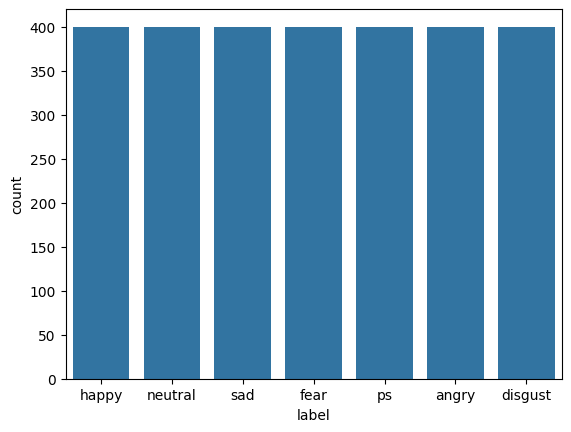

In [12]:
sns.countplot(data=df,x='label')

In [13]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

In [14]:
df.drop('label_count', axis=1, inplace = True)

In [15]:
print(df.head())
print(df['label'].unique())

                                              speech  label
0  /content/tess toronto emotional speech set dat...  happy
1  /content/tess toronto emotional speech set dat...  happy
2  /content/tess toronto emotional speech set dat...  happy
3  /content/tess toronto emotional speech set dat...  happy
4  /content/tess toronto emotional speech set dat...  happy
['happy' 'neutral' 'sad' 'fear' 'ps' 'angry' 'disgust']


In [16]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_mop_happy.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_jail_happy.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_goose_happy.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_void_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_deep_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_pass_sad.wav'],
      dtype=object)

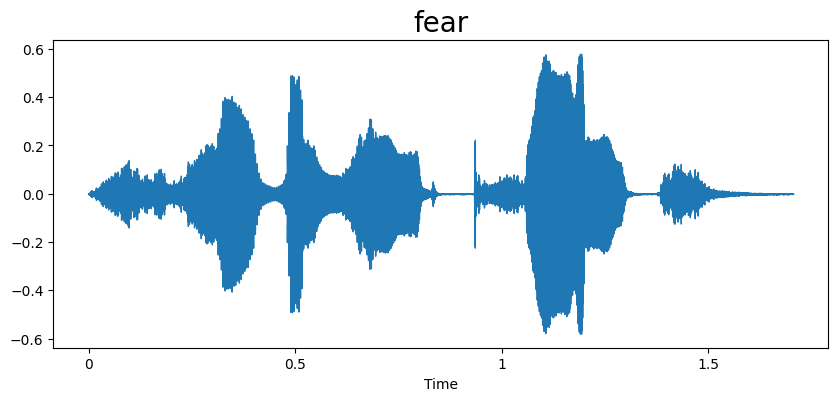

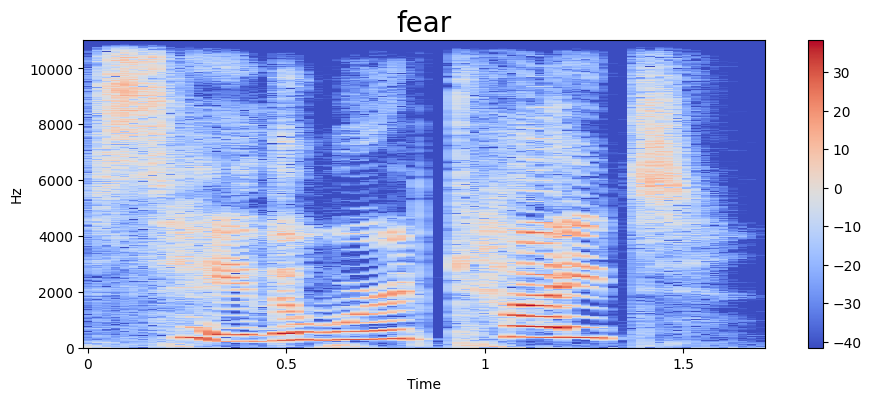

In [17]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

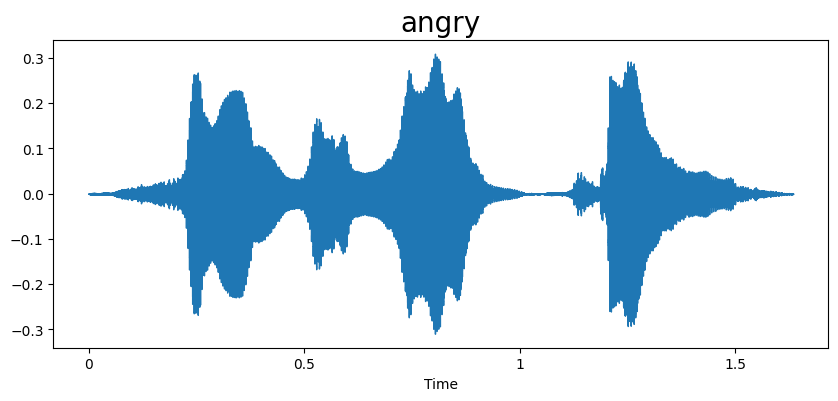

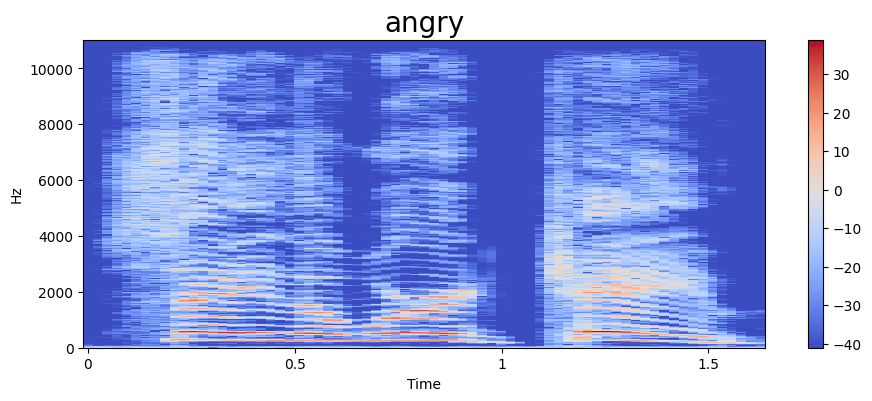

In [18]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

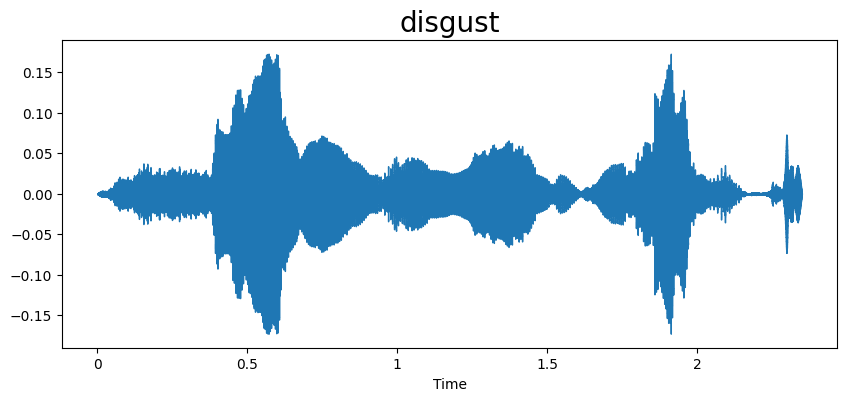

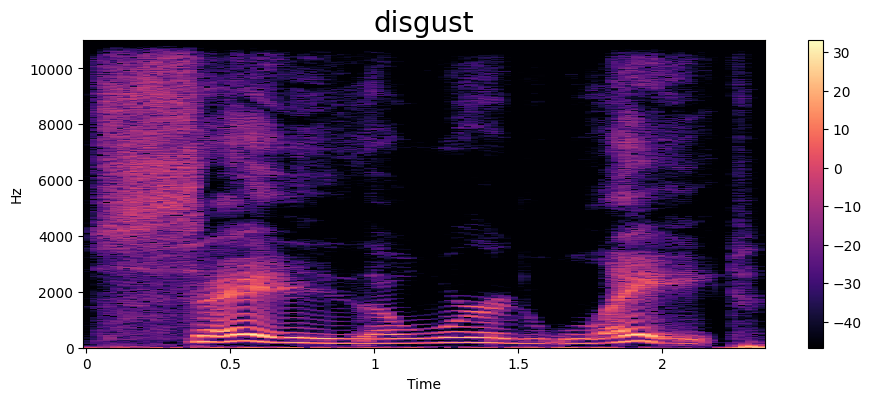

In [19]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

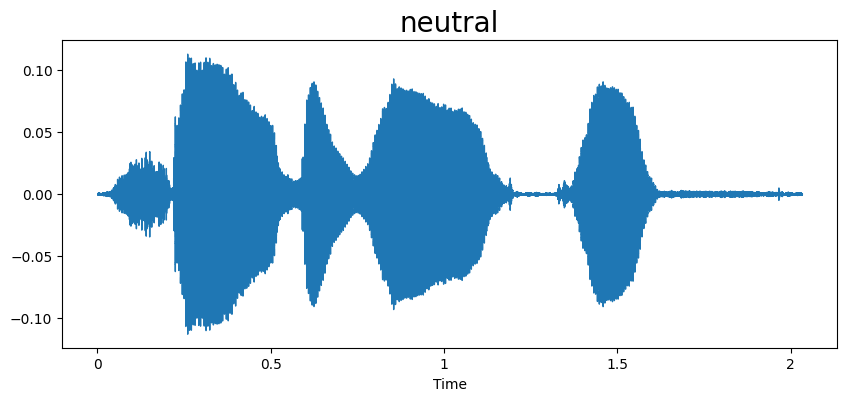

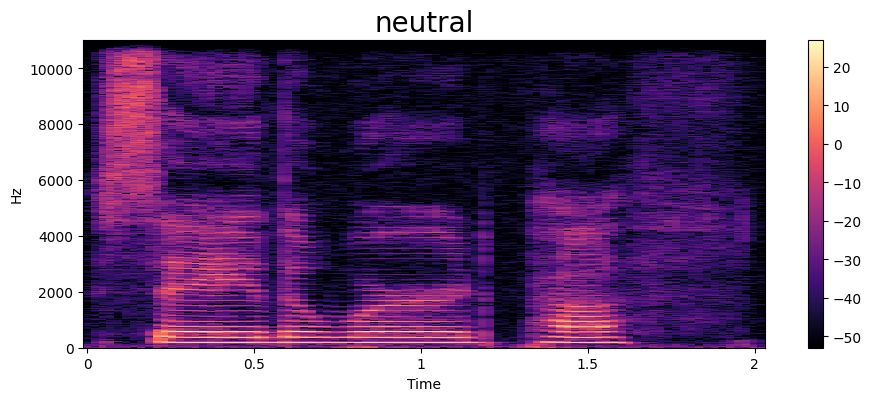

In [20]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

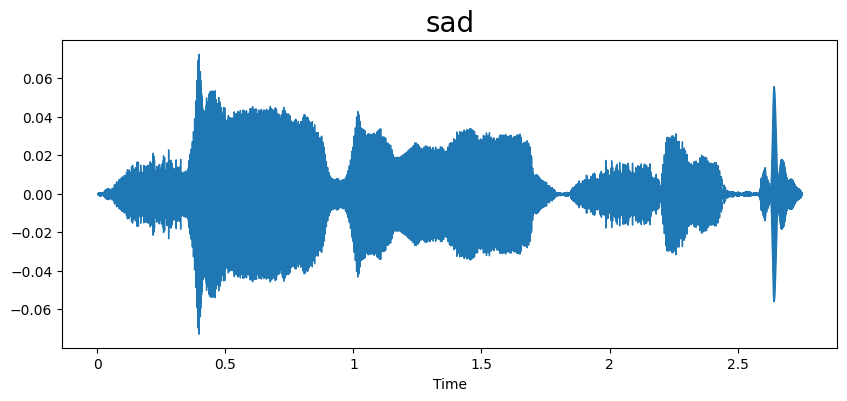

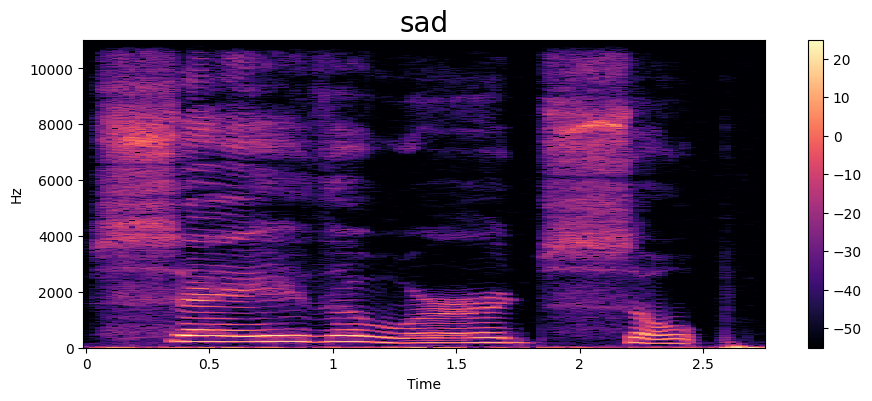

In [21]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

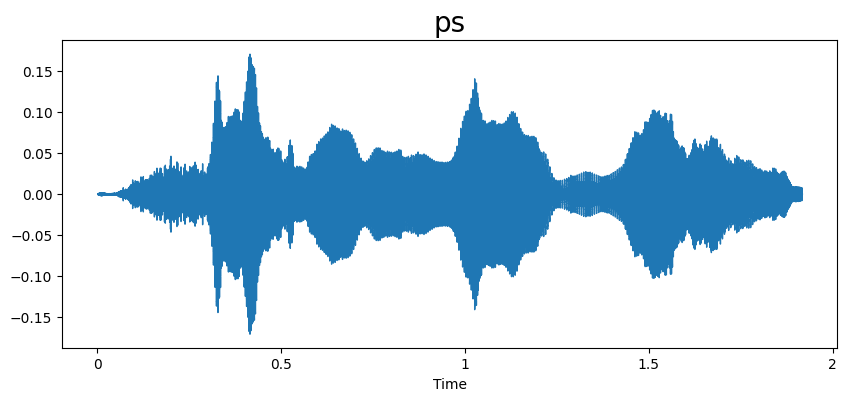

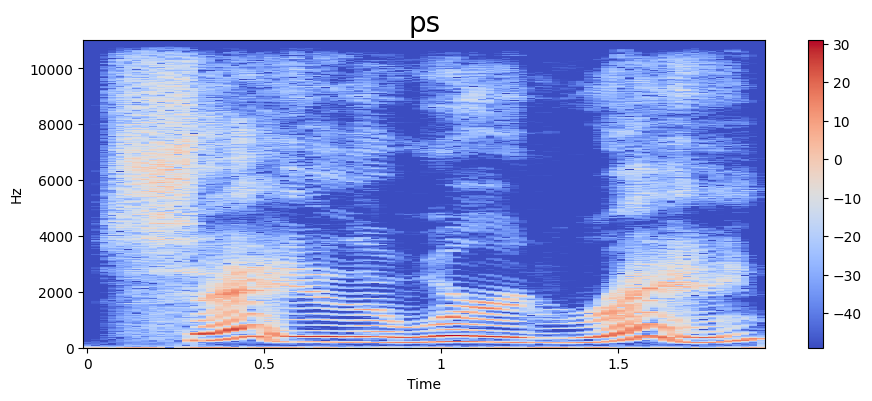

In [22]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

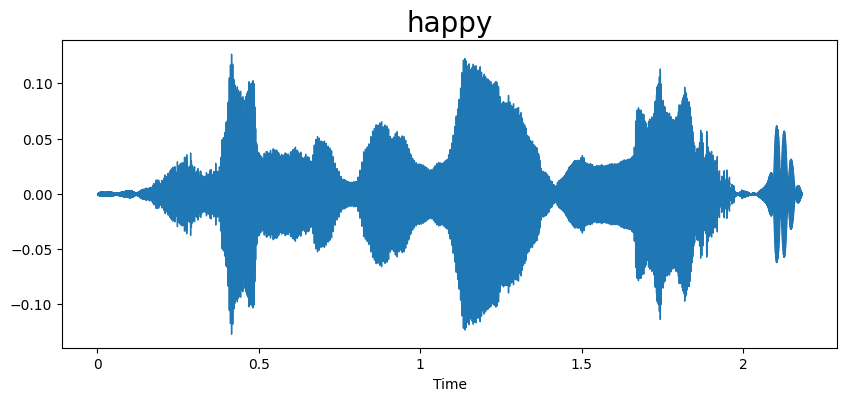

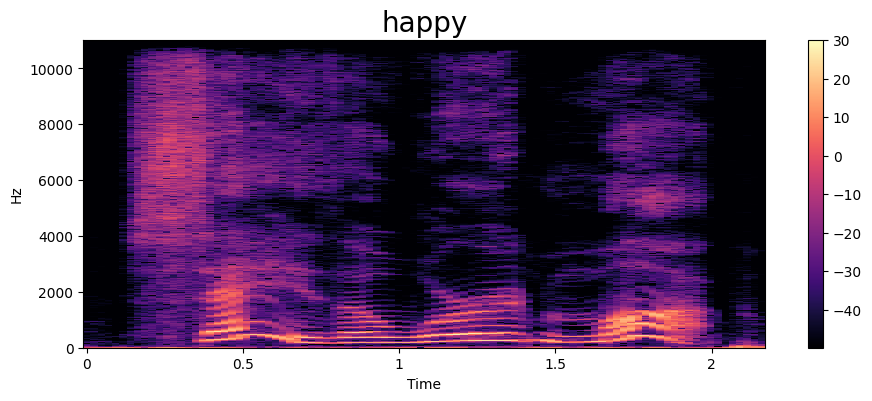

In [23]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [24]:
#feature extraction
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [25]:
extract_mfcc(df['speech'][0])
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

,speech
0,"[-460.7585, 113.900536, 23.663628, -13.877024,..."
1,"[-449.13742, 96.45725, 17.998125, -8.307005, -..."
2,"[-484.74765, 86.24343, 23.298674, -4.9515595, ..."
3,"[-453.62155, 72.9814, 17.660355, 10.043306, 11..."
4,"[-470.51227, 100.68906, 18.407953, 1.7734963, ..."
...,...
2795,"[-386.84512, 79.1401, 23.153788, 41.69883, -0...."
2796,"[-374.33188, 73.79313, 28.351664, 58.40284, 0...."
2797,"[-418.53574, 88.28475, 27.516254, 37.002735, -..."
2798,"[-444.86426, 95.62697, 32.697212, 41.41305, 5...."


In [26]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [27]:
# input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [29]:
y=y.toarray()

In [30]:
y.shape

(2800, 7)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train,y_val=train_test_split(X,y,test_size=.2,random_state=42)

Creating a LSTM Model

In [32]:
#Create the LSTM Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model=Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')

])

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"
#Train the model
history=model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=30, batch_size=64)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - accuracy: 0.2211 - loss: 1.8793 - val_accuracy: 0.6536 - val_loss: 0.9485
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 237ms/step - accuracy: 0.5295 - loss: 1.1657 - val_accuracy: 0.7768 - val_loss: 0.6083
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.7092 - loss: 0.7542 - val_accuracy: 0.8643 - val_loss: 0.4793
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - accuracy: 0.7922 - loss: 0.6349 - val_accuracy: 0.9179 - val_loss: 0.2465
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 308ms/step - accuracy: 0.8725 - loss: 0.4171 - val_accuracy: 0.9464 - val_loss: 0.1559
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.9039 - loss: 0.3291 - val_accuracy: 0.9321 - val_loss: 0.2231
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 345ms/step - accuracy: 0.9275 - loss: 0.2769 - val_accuracy: 0.9429 - val_loss: 0.1681
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.9227 - loss: 0.2662 - val_accurac

In [35]:
#Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.9918 - loss: 0.0265 - val_accuracy: 0.9875 - val_loss: 0.0625
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 224ms/step - accuracy: 0.9925 - loss: 0.0209 - val_accuracy: 0.9911 - val_loss: 0.0327
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 372ms/step - accuracy: 0.9960 - loss: 0.0159 - val_accuracy: 0.9804 - val_loss: 0.1353
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 217ms/step - accuracy: 0.9936 - loss: 0.0522 - val_accuracy: 0.9946 - val_loss: 0.0235
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.9972 - loss: 0.0149 - val_accuracy: 0.9946 - val_loss: 0.0496
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - accuracy: 0.9819 - loss: 0.0928 - val_accuracy: 0.9857 - val_loss: 0.0585
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.9873 - loss: 0.0384 - val_accuracy: 0.9929 - val_loss: 0.0448
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.9831 - loss: 0.0569 - val_accuracy

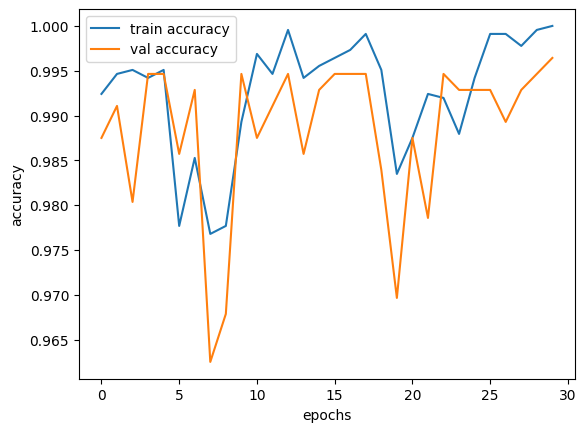

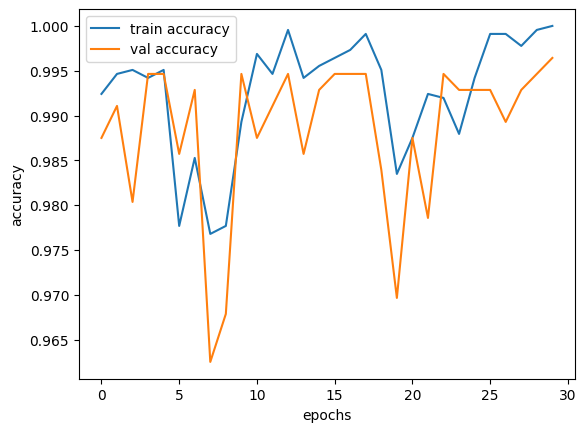

In [37]:
#plot the results
epochs=list(range(30))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

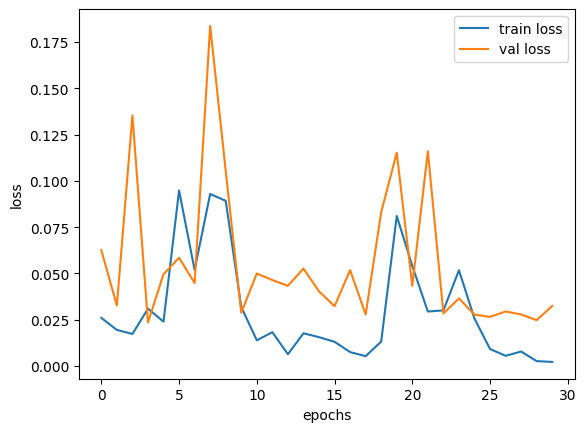

In [38]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [39]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

In [41]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[73  1  0  0  0  0  0]
 [ 0 82  0  0  0  0  0]
 [ 0  0 86  0  0  0  0]
 [ 0  0  0 77  0  0  0]
 [ 0  0  0  0 86  0  0]
 [ 0  0  0  1  0 69  0]
 [ 0  0  0  0  0  0 85]]


In [42]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))#Correlation HeatMap
plt.figure(figsize=(8, 6))

Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.99      0.99        74
     disgust       0.99      1.00      0.99        82
        fear       1.00      1.00      1.00        86
       happy       0.99      1.00      0.99        77
     neutral       1.00      1.00      1.00        86
          ps       1.00      0.99      0.99        70
         sad       1.00      1.00      1.00        85

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

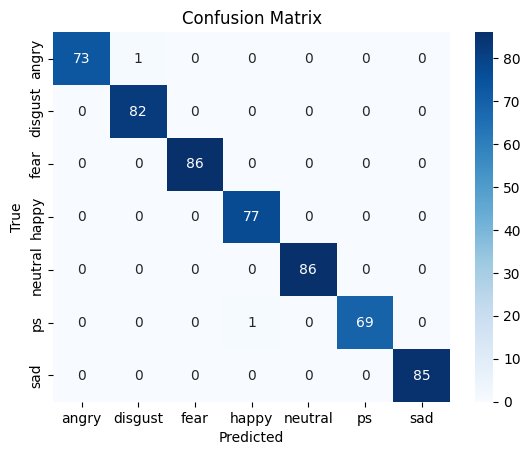

In [43]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()